In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data.csv')

In [6]:
df

,Timestamp,OUTPUT_COUNT_DAY_1,KO6_MOTOR_SET_FREQ,CUTTING_SET_FREQ,STATUS,KO5_MOTOR_SET_FREQ,METAL_OIL_SUPPLY_PRESS_CONTR,KO4_MOTOR_SET_FREQ,KO2_MOTOR_SET_FREQ,MAIN_MOTOR_CURR,...,METAL_TEMP_CUT,KO5_MOTOR_INVERTER_ALM,MAIN_MOTOR_SET_FREQ,KO1_MOTOR_INVERTER_ALM,TRANS_POS_DOWN_SET_H,OUTPUT_COUNT_DAY_2,OUTPUT_COUNT_SUM,TRANS_POS_DOWN,TRANS_POS_RIGHT,MAIN_MOTOR_ALM
0,2022-05-02 06:32:33,25878.0,3000.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.50,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,1741.75,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.42,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.50,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579292,2022-05-14 04:34:32,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579293,2022-05-14 04:34:33,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579294,2022-05-14 04:34:39,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579295,2022-05-14 04:34:40,29160.0,6000.0,6000.0,0.0,6000.0,262.579,6000.0,6000.0,3900.42,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0


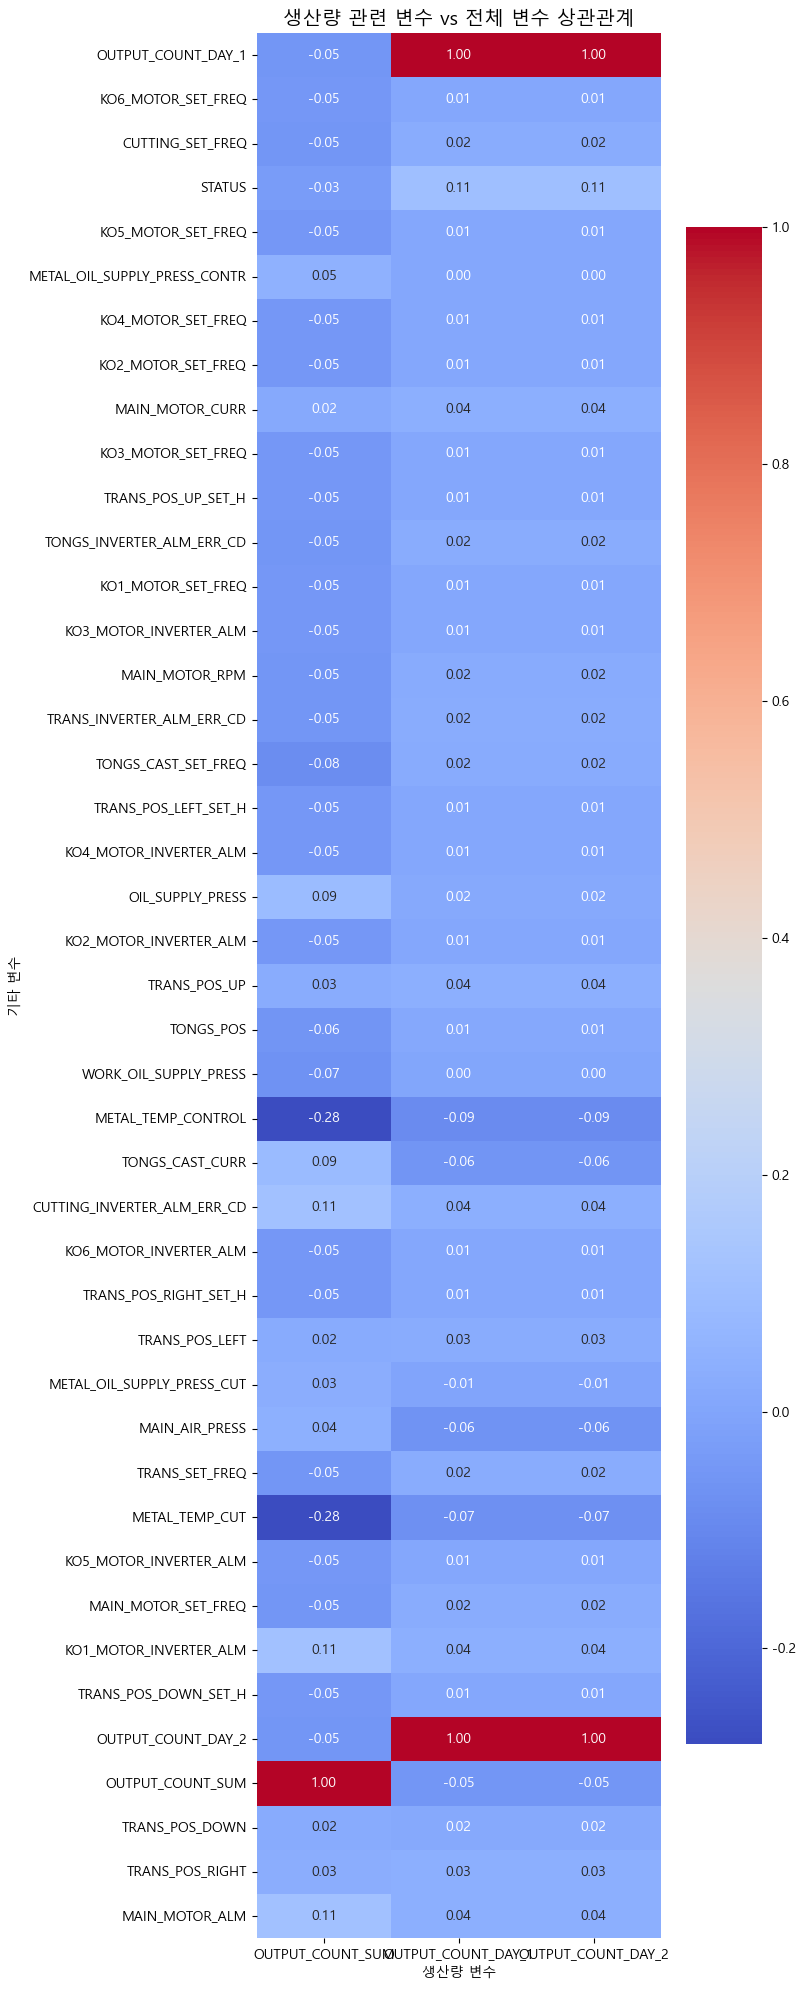

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 숫자형 컬럼만 추출
numeric_df = df.select_dtypes(include='number')

# 2. 생산량 관련 컬럼 선택
output_cols = ['OUTPUT_COUNT_SUM', 'OUTPUT_COUNT_DAY_1', 'OUTPUT_COUNT_DAY_2']

# 3. 상관관계 행렬 계산 (생산량 컬럼 기준으로 나머지 변수들과의 상관관계)
corr_matrix = numeric_df.corr().loc[output_cols]

# 4. 히트맵 시각화
plt.figure(figsize=(8, 20))  # 가로 좁게, 세로 길게
sns.heatmap(corr_matrix.T, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("생산량 관련 변수 vs 전체 변수 상관관계", fontsize=14)
plt.xlabel("생산량 변수")
plt.ylabel("기타 변수")
plt.tight_layout()
plt.show()

In [44]:
# METAL_TEMP_CONTROL, METAL_TEMP_CUT
# SUM이 0인 구간 제거하고 다시 시각화
metal_temp_df = df[['METAL_TEMP_CONTROL', 'METAL_TEMP_CUT', 'OUTPUT_COUNT_DAY_1', 'STATUS']].copy()
metal_temp_df = metal_temp_df[(df['OUTPUT_COUNT_DAY_1'] != 0) & (df['STATUS'] == 2) & (df['Timestamp'] >= '2022-05-12 00:00:00') & (df['Timestamp'] < '2022-05-13 00:00:00')]

metal_temp_df

,METAL_TEMP_CONTROL,METAL_TEMP_CUT,OUTPUT_COUNT_DAY_1,STATUS
463566,27.0,26.0,31295.0,2.0
463567,27.0,26.0,31297.5,2.0
463568,27.0,26.0,31299.5,2.0
463569,27.0,26.0,31302.0,2.0
463570,27.0,26.0,31304.5,2.0
...,...,...,...,...
525485,43.0,42.0,19431.0,2.0
525486,43.0,42.0,19433.5,2.0
525487,43.0,42.0,19435.5,2.0
525488,43.0,42.0,19438.0,2.0


In [45]:
# 작동 중 (STATUS == 2)인 구간만 필터링
active_df = metal_temp_df.copy()
active_df

,METAL_TEMP_CONTROL,METAL_TEMP_CUT,OUTPUT_COUNT_DAY_1,STATUS
463566,27.0,26.0,31295.0,2.0
463567,27.0,26.0,31297.5,2.0
463568,27.0,26.0,31299.5,2.0
463569,27.0,26.0,31302.0,2.0
463570,27.0,26.0,31304.5,2.0
...,...,...,...,...
525485,43.0,42.0,19431.0,2.0
525486,43.0,42.0,19433.5,2.0
525487,43.0,42.0,19435.5,2.0
525488,43.0,42.0,19438.0,2.0


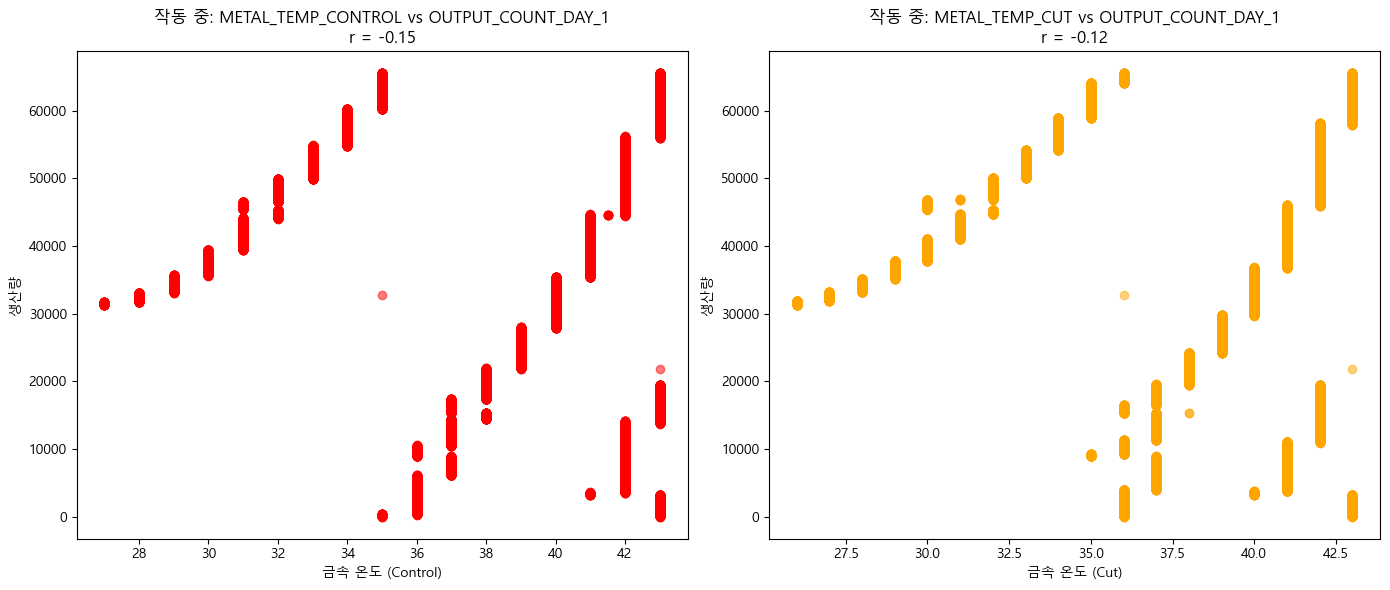

In [46]:
# 상관계수 계산
corr_control = active_df['METAL_TEMP_CONTROL'].corr(active_df['OUTPUT_COUNT_DAY_1'])
corr_cut = active_df['METAL_TEMP_CUT'].corr(active_df['OUTPUT_COUNT_DAY_1'])

# 금속 온도 vs 생산량 (작동 중일 때만)
plt.figure(figsize=(14, 6))

# Control
plt.subplot(1, 2, 1)
plt.scatter(active_df['METAL_TEMP_CONTROL'], active_df['OUTPUT_COUNT_DAY_1'], color='red', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CONTROL vs OUTPUT_COUNT_DAY_1\nr = {corr_control:.2f}')
plt.xlabel('금속 온도 (Control)')
plt.ylabel('생산량')

# Cut
plt.subplot(1, 2, 2)
plt.scatter(active_df['METAL_TEMP_CUT'], active_df['OUTPUT_COUNT_DAY_1'], color='orange', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CUT vs OUTPUT_COUNT_DAY_1\nr = {corr_cut:.2f}')
plt.xlabel('금속 온도 (Cut)')
plt.ylabel('생산량')

plt.tight_layout()
plt.show()


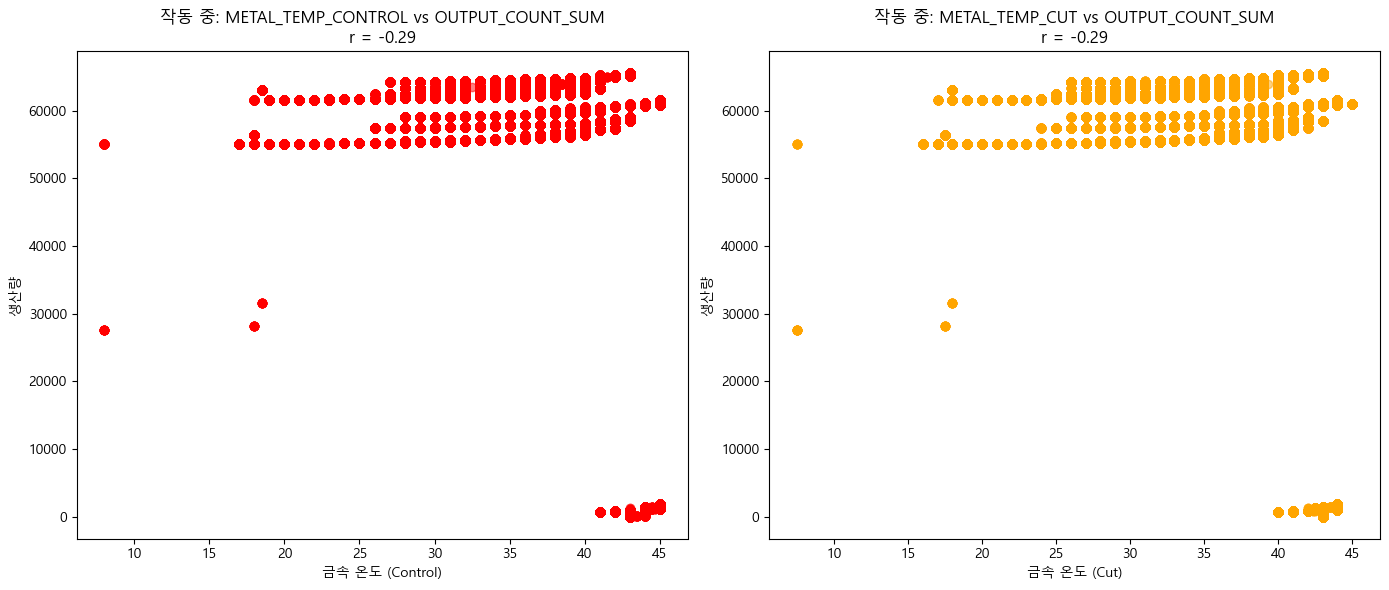

In [14]:
# 작동 중 (STATUS == 2)인 구간만 필터링
active_df = df[df['STATUS'] == 2]

# 상관계수 계산
corr_control = active_df['METAL_TEMP_CONTROL'].corr(active_df['OUTPUT_COUNT_SUM'])
corr_cut = active_df['METAL_TEMP_CUT'].corr(active_df['OUTPUT_COUNT_SUM'])

# 금속 온도 vs 생산량 (작동 중일 때만)
plt.figure(figsize=(14, 6))

# Control
plt.subplot(1, 2, 1)
plt.scatter(active_df['METAL_TEMP_CONTROL'], active_df['OUTPUT_COUNT_SUM'], color='red', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CONTROL vs OUTPUT_COUNT_SUM\nr = {corr_control:.2f}')
plt.xlabel('금속 온도 (Control)')
plt.ylabel('생산량')

# Cut
plt.subplot(1, 2, 2)
plt.scatter(active_df['METAL_TEMP_CUT'], active_df['OUTPUT_COUNT_SUM'], color='orange', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CUT vs OUTPUT_COUNT_SUM\nr = {corr_cut:.2f}')
plt.xlabel('금속 온도 (Cut)')
plt.ylabel('생산량')

plt.tight_layout()
plt.show()


### 하나의 사이클로만 상관관계 파악한 결과

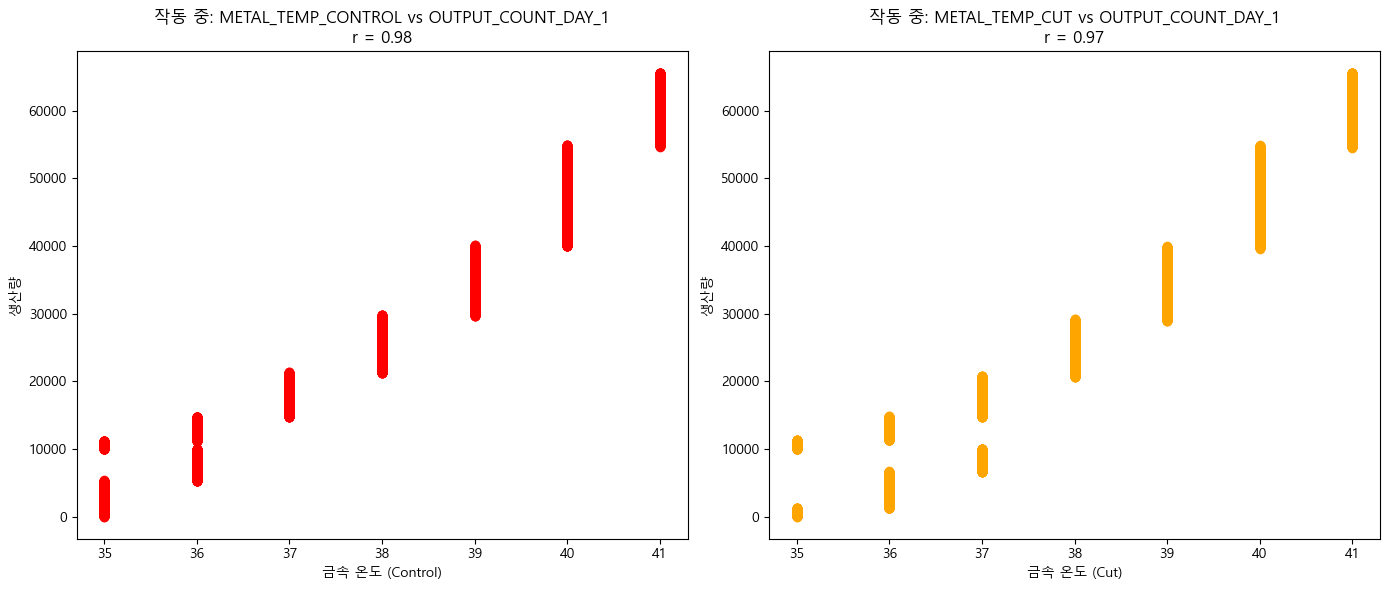

In [3]:
df1 = pd.read_csv('cycle_12.csv')
# 작동 중 (STATUS == 2)인 구간만 필터링
active_df = df1[df1['STATUS'] == 2]

# 상관계수 계산
corr_control = active_df['METAL_TEMP_CONTROL'].corr(active_df['OUTPUT_COUNT_DAY_1'])
corr_cut = active_df['METAL_TEMP_CUT'].corr(active_df['OUTPUT_COUNT_DAY_1'])

# 금속 온도 vs 생산량 (작동 중일 때만)
plt.figure(figsize=(14, 6))

# Control
plt.subplot(1, 2, 1)
plt.scatter(active_df['METAL_TEMP_CONTROL'], active_df['OUTPUT_COUNT_DAY_1'], color='red', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CONTROL vs OUTPUT_COUNT_DAY_1\nr = {corr_control:.2f}')
plt.xlabel('금속 온도 (Control)')
plt.ylabel('생산량')

# Cut
plt.subplot(1, 2, 2)
plt.scatter(active_df['METAL_TEMP_CUT'], active_df['OUTPUT_COUNT_DAY_1'], color='orange', alpha=0.5)
plt.title(f'작동 중: METAL_TEMP_CUT vs OUTPUT_COUNT_DAY_1\nr = {corr_cut:.2f}')
plt.xlabel('금속 온도 (Cut)')
plt.ylabel('생산량')

plt.tight_layout()
plt.show()
